In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
# 测试文件从 ftp://ftp.cdc.noaa.gov/pub/Datasets/ncep.reanalysis2/surface/mslp.2020.nc 下载
ds = xr.open_dataset("mslp.2020.nc")

In [3]:
ds.dims

Frozen(SortedKeysDict({'lat': 73, 'lon': 144, 'time': 1096, 'nbnds': 2}))

In [4]:
mslp = ds.mslp
mslp_mean = mslp.mean("time")  # 对时间求平均

In [5]:
mslp_jan = mslp.loc["2020-01-01":"2020-02-01"]  # 筛选出一月份的资料

In [6]:
mslp_jan_mean = mslp_jan.mean("time")  #对一月的资料求时间平均

In [7]:
mslp_jan_mean_diff = mslp_jan_mean - mslp_mean  # 计算一月份距平

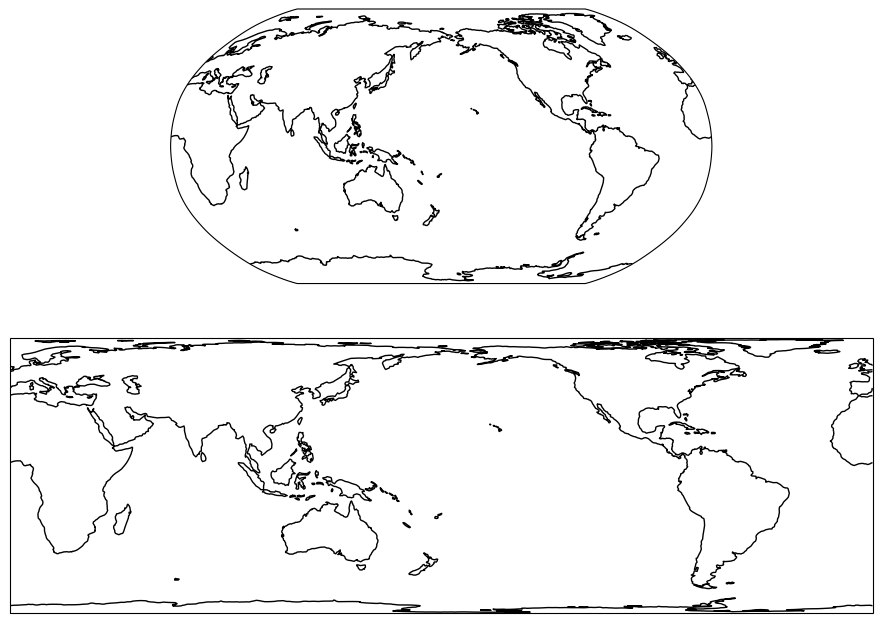

In [8]:
# 开始绘图
fig = plt.figure(figsize=(12.8, 8), dpi=100)  # 图像大小 8*4.8 inch^2, dpi=100, 所以表示代表图片分辨率为 800*480
# subplot为子图，211代表在2*1的fig上的第一个位置画图
ax1 = plt.subplot(211, projection=ccrs.Robinson(central_longitude=180))  # 第一个图是Robinson投影
ax1.coastlines()
ax2 = plt.subplot(212, projection=ccrs.LambertCylindrical(central_longitude=180)) # 第二个图是LambertCylindrical投影
ax2.coastlines()

In [9]:
ax1.gridlines()
ax2.gridlines(draw_labels=True)  # 第二子图上绘制 labels

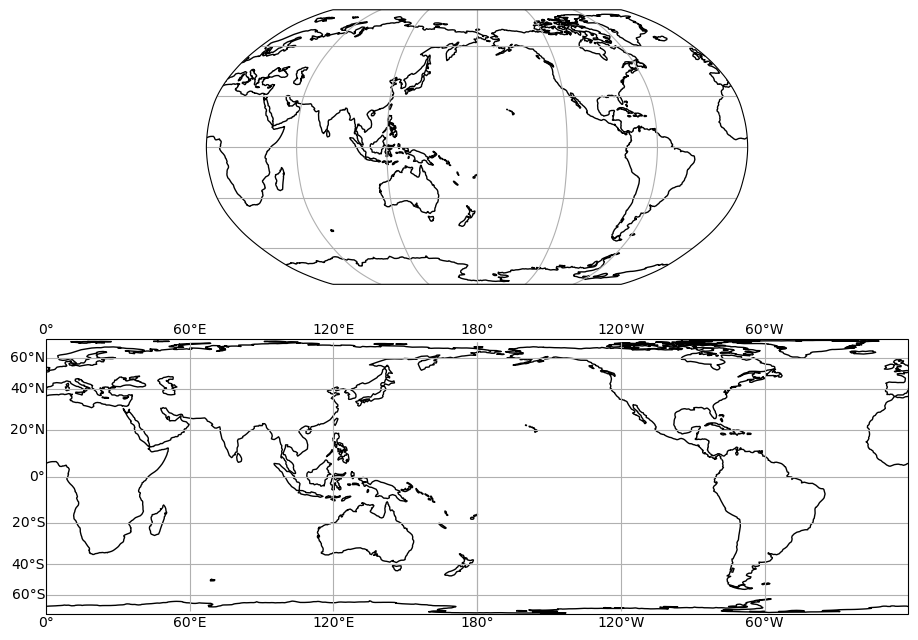

In [10]:
fig

In [11]:
cf1 = ax1.contourf(ds.lon, ds.lat, mslp_mean, transform=ccrs.PlateCarree())  # 在ax1上绘制全部的平均值
title1 = "%s Time Mean" % mslp.var_desc
ax1.set_title(title1)  # 设置图一的标题

cf2 = ax2.contourf(ds.lon, ds.lat, mslp_jan_mean_diff,
             cmap='Spectral_r', transform=ccrs.PlateCarree())  # 在ax2上绘制距平图，使用特制的色标
title2 = "JAN %s from Time Mean" % mslp.var_desc
ax2.set_title(title2)  # 设置图2的标题

Text(0.5, 1.0, 'JAN Mean Sea Level Pressure from Time Mean')

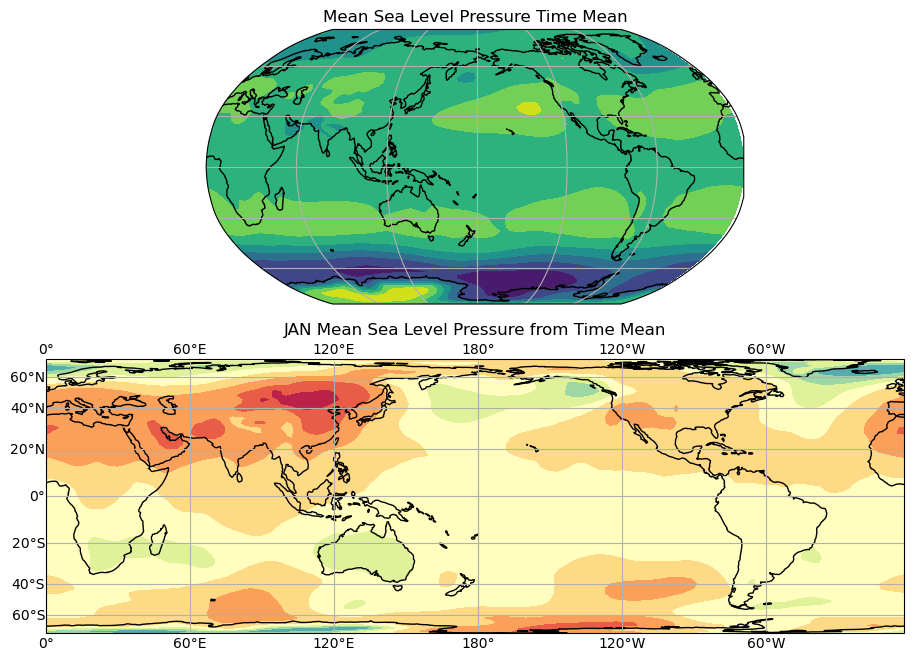

In [12]:
fig

In [13]:
fig.colorbar(cf1, ax=ax1)
fig.colorbar(cf2, ax=ax2)

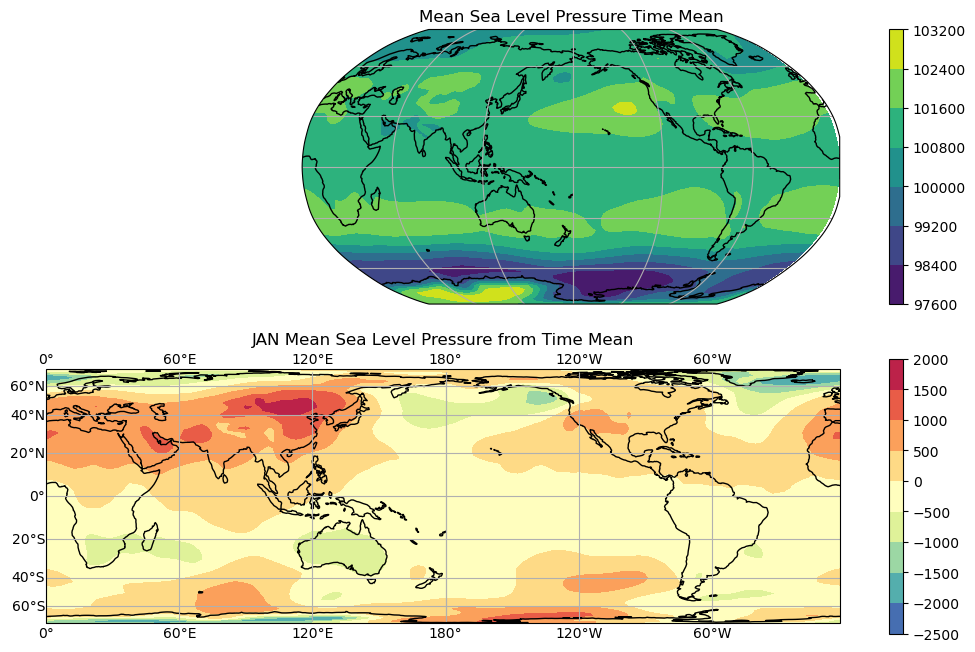

In [14]:
fig

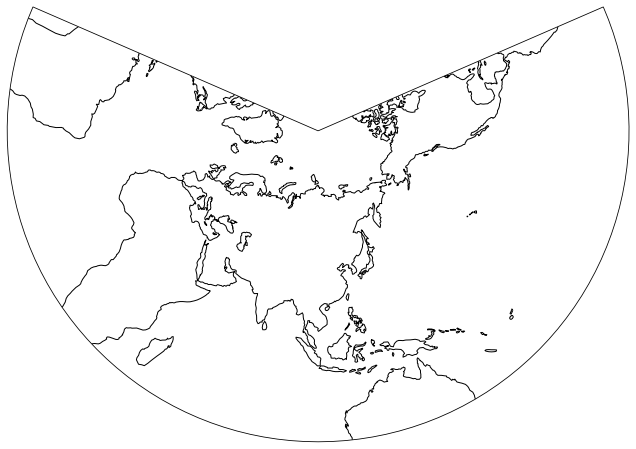

In [63]:
fig.clear()
fig = plt.figure(figsize=(12.8,8))
ax1 = plt.subplot(
    projection=ccrs.LambertConformal(
        central_latitude=35,central_longitude=105
    ))
#ax1.set_extent([75,135, 15, 55 ], ccrs.PlateCarree())
ax1.coastlines()

In [64]:
mslp_clip = mslp.loc[:, 55:15, 75:135] # 对区域切片 3D，现在纬度是倒叙
mslp_clip_1 = mslp_clip[0]/100  # 拿出第一个时次的数据 2D，除以100成百帕
mslp_clip_cf = ax1.contourf(mslp_clip.lon, mslp_clip.lat, mslp_clip_1, transform=ccrs.PlateCarree())
mslp_clip_c = ax1.contour(mslp_clip.lon, mslp_clip.lat, mslp_clip_1,
                           colors='yellow',
                           transform=ccrs.PlateCarree())

In [65]:
fig.colorbar(mslp_clip_cf, ax=ax1)

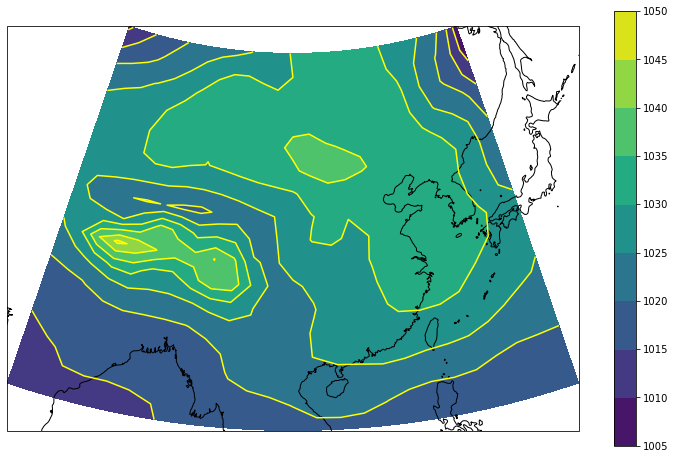

In [66]:
fig

In [67]:
ax1.gridlines(draw_labels=True)

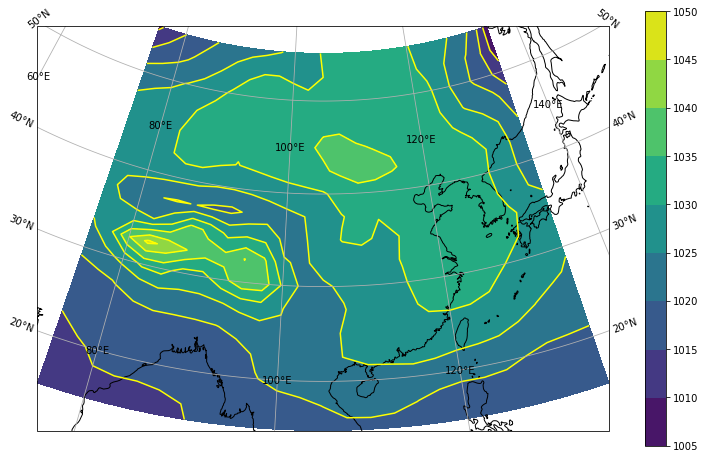

In [68]:
fig